In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic (1).csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


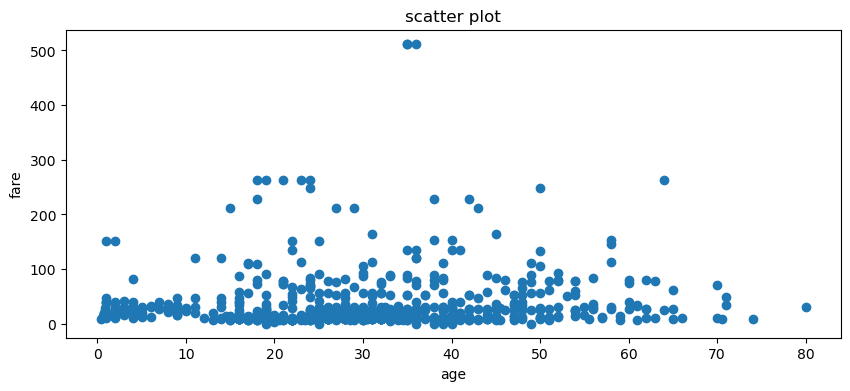

In [4]:
fig,ax=plt.subplots(figsize=(10,4))
ax.scatter(df['age'],df['fare'])
ax.set_xlabel('age')
ax.set_ylabel('fare')
plt.title("scatter plot")
plt.show()

<Axes: >

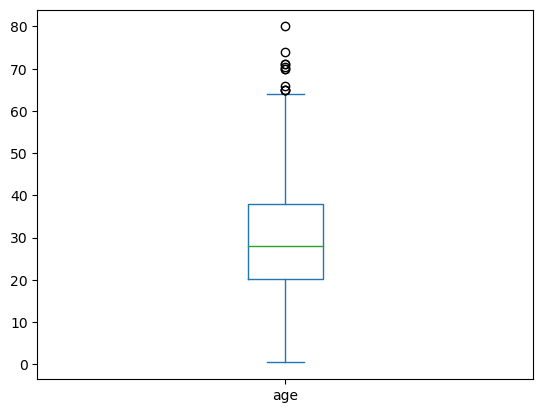

In [5]:
df['age'].plot(kind='box')

In [16]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print("lower_bound:",lower_bound)
print("upper_bound:",upper_bound)
print(iqr)

lower_bound: -6.6875
upper_bound: 64.8125
17.875


In [15]:
age_arr=df["age"]
ouliers=age_arr[(age_arr<=lower_bound) | (age_arr>=upper_bound)]
print("the following are the outliers in the boxplot of age:\n",ouliers )

the following are the outliers in the boxplot of age:
 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


<Axes: ylabel='Frequency'>

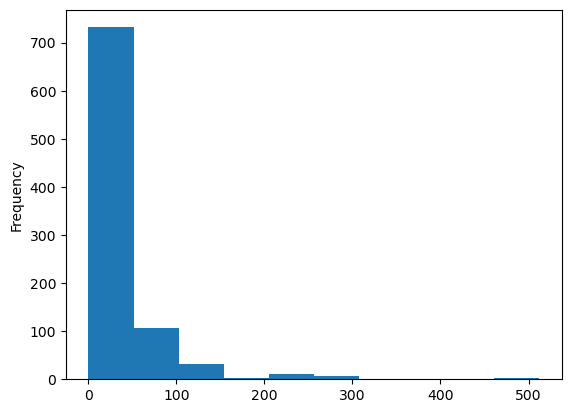

In [18]:
df['fare'].plot(kind='hist')

In [19]:
upperIndex=df[df['age']>upper_bound].index
df.drop(upperIndex,inplace=True)
lowerIndex=df[df['age']<lower_bound].index
df.drop(lowerIndex,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     880 non-null    int64  
 1   pclass       880 non-null    int64  
 2   sex          880 non-null    object 
 3   age          703 non-null    float64
 4   sibsp        880 non-null    int64  
 5   parch        880 non-null    int64  
 6   fare         880 non-null    float64
 7   embarked     878 non-null    object 
 8   class        880 non-null    object 
 9   who          880 non-null    object 
 10  adult_male   880 non-null    bool   
 11  deck         198 non-null    object 
 12  embark_town  878 non-null    object 
 13  alive        880 non-null    object 
 14  alone        880 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 98.0+ KB


In [20]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic (1).csv')

In [21]:
m=np.mean(df['age'])
print('mean:',m)
for i in df['age']:
    if i<lower_bound or i>upper_bound:
        df['age']=df['age'].replace(i,m)

mean: 29.69911764705882


In [22]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic (1).csv')

In [24]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [25]:
m=df['age'].median()
print(m)
for i in df['age']:
    if i<lower_bound or i>upper_bound:
        df['age']=df['age'].replace(i,m)

28.0
